# Importing the libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the environment

In [35]:
grid_size = 9
start = (8, 0)
goal = (0, 8)
in_tunnel = (6,2)
out_tunnel = (2,6)
walls = {(5,1),(5,2),(5,3),(6,3),(7,3),(0,5),(1,5),(2,5),(3,5),(3,6),(3,7),(3,8)}

# Defining Value Iteration

In [36]:
def value_iteration(grid_size, start, goal, in_tunnel, out_tunnel, walls, gamma=0.9, theta=0.000001):
    V = np.zeros((grid_size, grid_size))
    
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                if (i, j) == goal or (i, j) in walls:
                    continue
                v = V[i, j]
                q_values = []
                for action in [(0, 1), (0, -1), (1, 0), (-1, 0), (0,0)]:  # Right, Left, Down, Up, stay
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) in walls:
                        next_i, next_j = i, j
                    elif (next_i, next_j) == in_tunnel:
                        next_i, next_j = out_tunnel
                    elif not (0 <= next_i < grid_size and 0 <= next_j < grid_size):
                        next_i, next_j = i, j
                    reward = 1 if (next_i, next_j) == goal else 0
                    q_values.append(reward + gamma * V[next_i, next_j])
                V[i, j] = max(q_values)
                delta = max(delta, abs(v - V[i, j]))
        if delta < theta:
            break
    
    policy = np.zeros((grid_size, grid_size), dtype=int)
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal or (i, j) in walls:
                continue
            q_values = []
            for action in [(0, 1), (0, -1), (1, 0), (-1, 0), (0,0)]:  # Right, Left, Down, Up, stay
                next_i, next_j = i + action[0], j + action[1]
                if (next_i, next_j) in walls:
                    next_i, next_j = i, j
                elif (next_i, next_j) == in_tunnel:
                    next_i, next_j = out_tunnel
                elif not (0 <= next_i < grid_size and 0 <= next_j < grid_size):
                    next_i, next_j = i, j
                reward = 1 if (next_i, next_j) == goal else 0
                
                q_values.append(reward + gamma * V[next_i, next_j])
            policy[i, j] = np.argmax(q_values)

    return V, policy


# Defining Policy Iteration

In [37]:
def policy_iteration(grid_size, start, goal, in_tunnel, out_tunnel, walls, gamma=0.9):
    policy = np.random.randint(0, 4, (grid_size, grid_size))
    
    while True:
        # Policy Evaluation
        V = np.zeros((grid_size, grid_size))
        while True:
            delta = 0
            for i in range(grid_size):
                for j in range(grid_size):
                    if (i, j) == goal or (i, j) in walls:
                        continue
                    v = V[i, j]
                    action = [(0, 1), (0, -1), (1, 0), (-1, 0), (0,0)][policy[i, j]]
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) in walls:
                        next_i, next_j = i, j
                    elif (next_i, next_j) == in_tunnel:
                        next_i, next_j = out_tunnel
                    elif not (0 <= next_i < grid_size and 0 <= next_j < grid_size):
                        next_i, next_j = i, j
                    reward = 1 if (next_i, next_j) == goal else 0
                    V[i, j] = reward + gamma * V[next_i, next_j]
                    delta = max(delta, abs(v - V[i, j]))
            if delta < 0.0001:
                break
        
        # Policy Improvement
        policy_stable = True
        for i in range(grid_size):
            for j in range(grid_size):
                if (i, j) == goal or (i, j) in walls:
                    continue
                old_action = policy[i, j]
                q_values = []
                for action in [(0, 1), (0, -1), (1, 0), (-1, 0), (0,0)]:  # Right, Left, Down, Up, stay
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) in walls:
                        next_i, next_j = i, j
                    elif (next_i, next_j) == in_tunnel:
                        next_i, next_j = out_tunnel
                    elif not (0 <= next_i < grid_size and 0 <= next_j < grid_size):
                        next_i, next_j = i, j
                    reward = 1 if (next_i, next_j) == goal else 0
                    q_values.append(reward + gamma * V[next_i, next_j])
                policy[i, j] = np.argmax(q_values)
                if old_action != policy[i, j]:
                    policy_stable = False
        
        if policy_stable:
            break
    
    return V, policy

# Defining the Visualization Function

In [38]:
def visualize_policy(policy, start, goal, in_tunnel, out_tunnel, walls, title):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    x = np.arange(0.5, policy.shape[0] + 0.5, 1)
    y = np.arange(0.5, policy.shape[1] + 0.5, 1)
    X, Y = np.meshgrid(x, y)
    
    U = np.zeros_like(policy)
    V = np.zeros_like(policy)
    
    U[policy == 0] = 1  # Right
    U[policy == 1] = -1  # Left
    V[policy == 2] = -1  # Down
    V[policy == 3] = 1  # Up
    U[policy == 4] = 0
    V[policy == 4] = 0
    for wall in walls:
        U[wall] = 0
        V[wall] = 0

    U[goal] = 0
    V[goal] = 0
    
    ax.quiver(X, Y, U, V)
    
    ax.plot(start[1] + 0.5, start[0] + 0.5, 'bo', markersize=15, label='Start')
    ax.plot(goal[1] + 0.5, goal[0] + 0.5, 'g*', markersize=20, label='Goal')
    ax.plot(in_tunnel[1] + 0.5, in_tunnel[0] + 0.5, 'rs', markersize=15, label='IN Tunnel')
    ax.plot(out_tunnel[1] + 0.5, out_tunnel[0] + 0.5, 'ms', markersize=15, label='OUT Tunnel')
    
    for wall in walls:
        ax.add_patch(plt.Rectangle((wall[1], wall[0]), 1, 1, fill=True, color='gray'))
    
    ax.set_xlim(0, policy.shape[1])
    ax.set_ylim(policy.shape[0], 0)
    ax.set_xticks(np.arange(0, policy.shape[1] + 1, 1))
    ax.set_yticks(np.arange(0, policy.shape[0] + 1, 1))
    ax.grid(True)
    
    plt.legend()
    plt.title(title)
    plt.show()

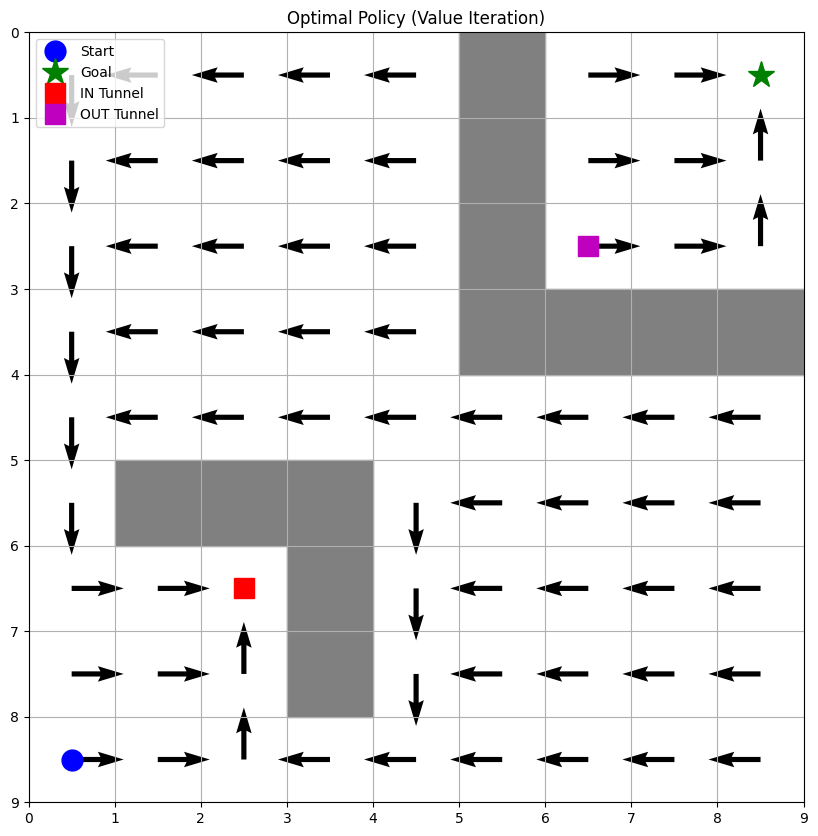

In [39]:
V_vi, policy_vi = value_iteration(grid_size, start, goal, in_tunnel, out_tunnel, walls)
visualize_policy(policy_vi, start, goal, in_tunnel, out_tunnel, walls, "Optimal Policy (Value Iteration)")


In [40]:
print("Value Function (Value Iteration):")
print(V_vi)
print("\nOptimum policy obtained from value iteration")
print(policy_vi)

Value Function (Value Iteration):
[[0.3138106  0.28242954 0.25418658 0.22876792 0.20589113 0.
  0.9        1.         0.        ]
 [0.34867844 0.3138106  0.28242954 0.25418658 0.22876792 0.
  0.81       0.9        1.        ]
 [0.38742049 0.34867844 0.3138106  0.28242954 0.25418658 0.
  0.729      0.81       0.9       ]
 [0.43046721 0.38742049 0.34867844 0.3138106  0.28242954 0.
  0.         0.         0.        ]
 [0.4782969  0.43046721 0.38742049 0.34867844 0.3138106  0.28242954
  0.25418658 0.22876792 0.20589113]
 [0.531441   0.         0.         0.         0.34867844 0.3138106
  0.28242954 0.25418658 0.22876792]
 [0.59049    0.6561     0.6561     0.         0.38742049 0.34867844
  0.3138106  0.28242954 0.25418658]
 [0.531441   0.59049    0.6561     0.         0.43046721 0.38742049
  0.34867844 0.3138106  0.28242954]
 [0.4782969  0.531441   0.59049    0.531441   0.4782969  0.43046721
  0.38742049 0.34867844 0.3138106 ]]

Optimum policy obtained from value iteration
[[2 1 1 1 1 0 0 

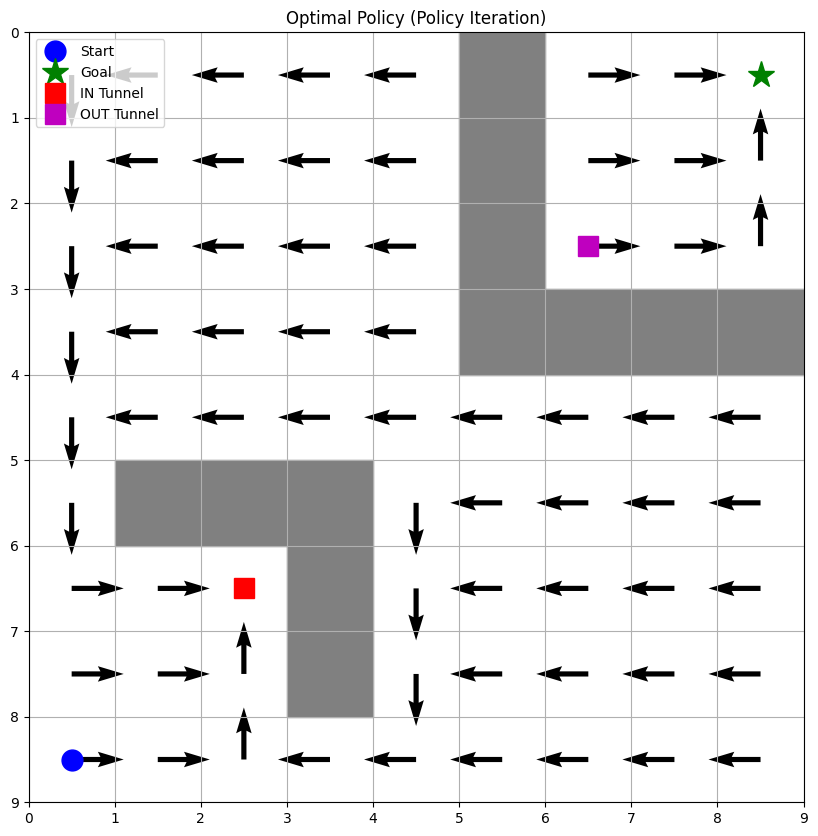

In [41]:
V_pi, policy_pi = policy_iteration(grid_size, start, goal, in_tunnel, out_tunnel, walls)
visualize_policy(policy_pi, start, goal, in_tunnel, out_tunnel, walls, "Optimal Policy (Policy Iteration)")


In [42]:
print("\nValue Function (Policy Iteration):")
print(V_pi)
print("\nOptimum policy obtained from policy iteration")
print(policy_pi)



Value Function (Policy Iteration):
[[0.3138106  0.28242954 0.25418658 0.22876792 0.20589113 0.
  0.9        1.         0.        ]
 [0.34867844 0.3138106  0.28242954 0.25418658 0.22876792 0.
  0.81       0.9        1.        ]
 [0.38742049 0.34867844 0.3138106  0.28242954 0.25418658 0.
  0.729      0.81       0.9       ]
 [0.43046721 0.38742049 0.34867844 0.3138106  0.28242954 0.
  0.         0.         0.        ]
 [0.4782969  0.43046721 0.38742049 0.34867844 0.3138106  0.28242954
  0.25418658 0.22876792 0.20589113]
 [0.531441   0.         0.         0.         0.34867844 0.3138106
  0.28242954 0.25418658 0.22876792]
 [0.59049    0.6561     0.6561     0.         0.38742049 0.34867844
  0.3138106  0.28242954 0.25418658]
 [0.531441   0.59049    0.6561     0.         0.43046721 0.38742049
  0.34867844 0.3138106  0.28242954]
 [0.4782969  0.531441   0.59049    0.531441   0.4782969  0.43046721
  0.38742049 0.34867844 0.3138106 ]]

Optimum policy obtained from policy iteration
[[2 1 1 1 1 3